In [1]:
import scvelo as scv

/opt/miniconda3/envs/sfn-workshop/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
scv.logging.print_version()
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.set_figure_params('scvelo')  # for beautified visualization

Running scvelo 0.2.2 (python 3.7.3) on 2021-01-07 10:41.


In [14]:
#Read data from loom file
scv_adata = scv.read('../BioInfo/ITGA6CT_cp.loom',cache = False)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


<bound method AnnData.var_names_make_unique of AnnData object with n_obs × n_vars = 12354 × 33538
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'>

In [23]:
#Make variables name unique
scv_adata.var_names_make_unique()

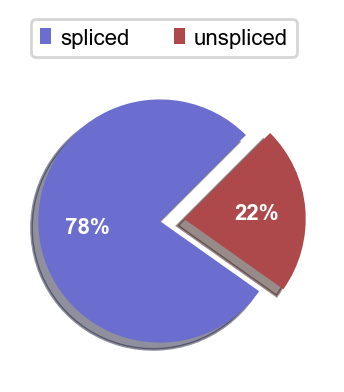

In [24]:
scv.pl.proportions(scv_adata)

In [25]:
#Show first fice rows of the obs field
scv_adata.obs.head(5)

,initial_size_spliced,initial_size_unspliced,initial_size,n_counts,velocity_self_transition,leiden
ITGA6CT:AAAGAACCACAGTACTx,7506,3620,7506.0,546.610474,0.002118,0
ITGA6CT:AAAGTCCCAGACTCTAx,4580,5001,4580.0,782.876587,0.215146,5
ITGA6CT:AAAGGTAGTCTCGCGAx,8097,3335,8097.0,734.063293,0.105389,3
ITGA6CT:AAAGGGCTCTGTCGCTx,6713,1042,6713.0,430.949707,0.059018,1
ITGA6CT:AAACGAAGTATTCCTTx,688,155,688.0,297.009552,0.120620,2


In [26]:
#Show first fice rows of the var field
scv_adata.var.head(5)

,Accession,Chromosome,End,Start,Strand,gene_count_corr,means,dispersions,dispersions_norm,highly_variable,velocity_gamma,velocity_r2,velocity_genes
CCNL2,ENSG00000221978,1,1399328,1385711,-,-0.0492,0.150181,-0.378197,-0.392658,True,0.055169,-0.058496,False
KLHL21,ENSG00000162413,1,6614607,6590724,-,-0.0049,0.027304,-0.304678,-0.272164,True,0.209382,-0.112052,False
ERRFI1,ENSG00000116285,1,8026308,8004404,-,-0.0196,0.004085,-0.176718,0.317121,True,2.875059,-0.880077,False
ENO1,ENSG00000074800,1,8879250,8861000,-,0.4525,1.027000,-1.182813,-0.171651,True,0.019877,0.364430,True
GPR157,ENSG00000180758,1,9129170,9100305,-,-0.0671,0.151476,-0.336933,-0.124386,True,0.330818,-0.388001,False


In [27]:
#Preprocessing the data
scv.pp.filter_genes(scv_adata, min_shared_counts=10)
scv.pp.normalize_per_cell(scv_adata)
scv.pp.filter_genes_dispersion(scv_adata, n_top_genes=3000)
scv.pp.log1p(scv_adata)

Skip filtering by dispersion since number of variables are less than `n_top_genes`.


In [28]:
scv.pp.filter_and_normalize(scv_adata, min_shared_counts=30, n_top_genes=2000)
scv.pp.moments(scv_adata, n_pcs=30, n_neighbors=30)

Exctracted 2000 highly variable genes.
computing moments based on connectivities
    finished (0:00:03) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [29]:
#Computing velocities
scv.tl.velocity_graph(scv_adata)

computing velocity graph
    finished (0:01:08) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [30]:
import scanpy as sc

computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocity embedding
    finished (0:00:04) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


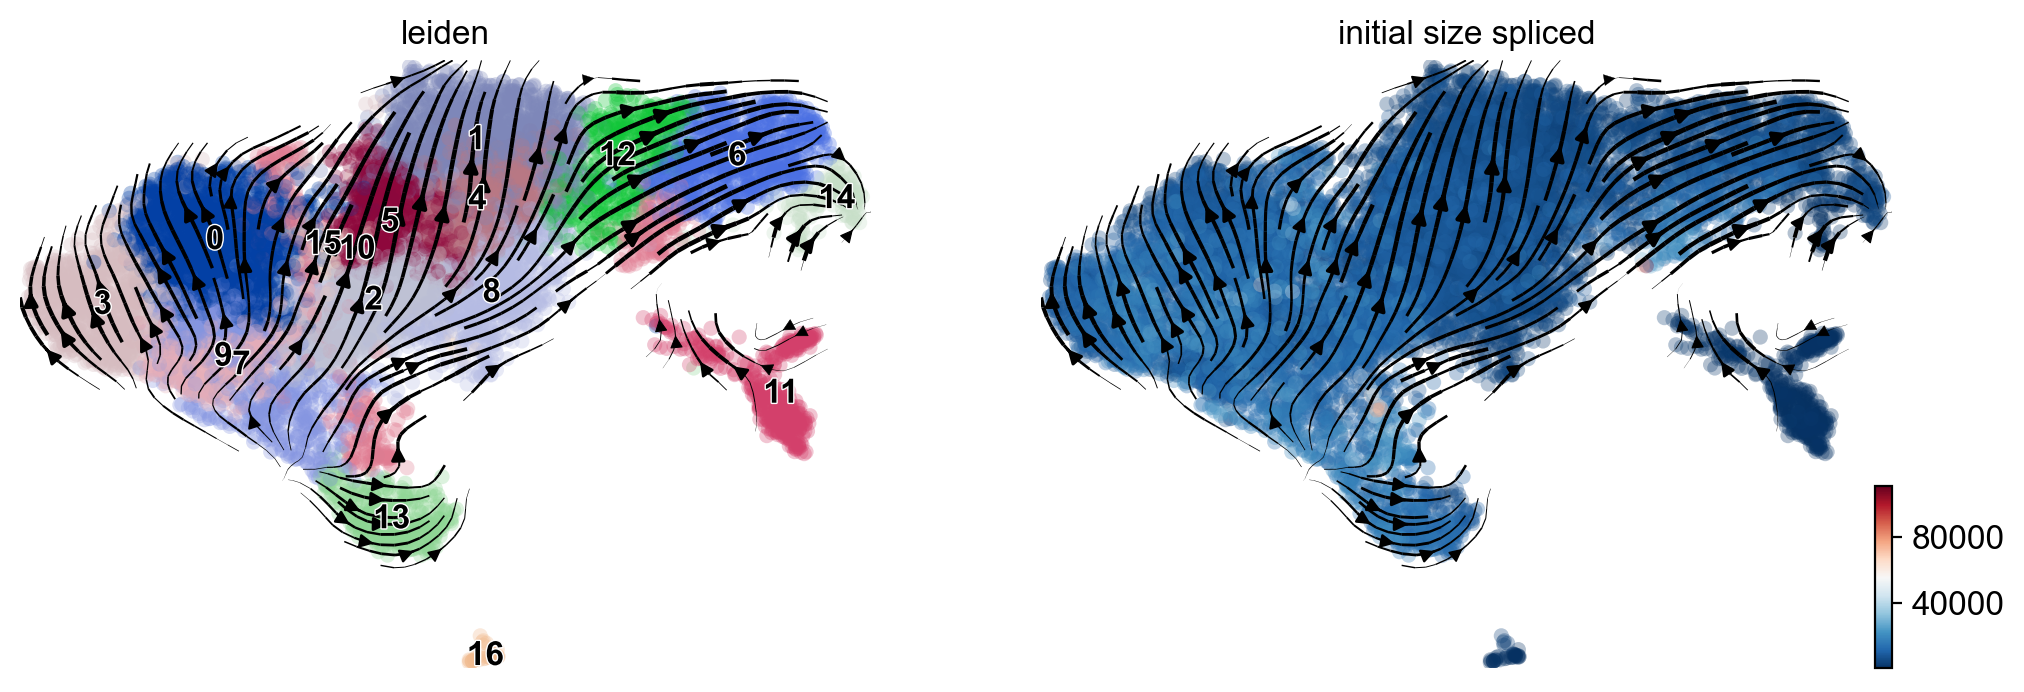

In [31]:
# Create UMAP in anndata structure
scv.pp.neighbors(scv_adata, n_neighbors=10, n_pcs=30)#Compute a neighborhood graph of observations
sc.tl.leiden(scv_adata)
vdata = scv_adata 
scv.tl.umap(scv_adata)
#Project the velocities
scv.pl.velocity_embedding_stream(scv_adata, basis='umap', color=['leiden','initial_size_spliced'])